In [56]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 14 15:21:58 2024

@author: Manfred Brath

Example script to demonstrate the usage of the flux_simulator_module for generating lookuptables.

"""
# %%
import numpy as np
import matplotlib.pyplot as plt
import FluxSimulator as fsm
from pyarts.plots import arts_lookup
from pyarts import arts

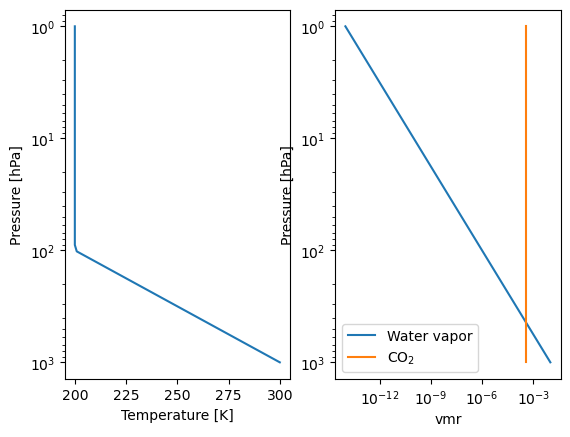

In [57]:
# %% generate example atmosphere needed for standard LUT

# This atmosphere is not intended to be fully realistic, but to be simply
# an example for the calculation of LUT.

# set pressure grid
pressure_profile = np.linspace(1000e2, 1e2, 80)

# create water vapor profile
# Water vapor is simply define by a 1st order
# polynomial in log-log space
# log h2o = a + b * log pressure
b = 4
a = -6 - b * 4
logH2O = a + b * np.log10(pressure_profile)
H2O_profile = 10**logH2O

# create temperature profile
# Temperature is simply define by a 1st order
# polynomial of log pressure
# T = a + b * log pressure
# For pressure < 100 hPa, the temperature is set to 200 K
b = 100
a = 200 - b * 4
temperature_profile = a + b * np.log10(pressure_profile)
temperature_profile[pressure_profile < 100e2] = (
    200  # set temperature to 200 K below 100 hPa
)

# CO2 vmr value
CO2 = 400e-6  # [vmr]

# set vmr_field
vmr = np.zeros((2, len(pressure_profile), 1, 1))
vmr[0, :, 0, 0] = H2O_profile
vmr[1, :, 0, 0] = CO2

# plot atmosphere profiles
fig, ax = plt.subplots(1, 2)
ax[0].semilogy(temperature_profile, pressure_profile / 100, label="Temperature")
ax[0].set_xlabel("Temperature [K]")
ax[0].set_ylabel("Pressure [hPa]")
ax[0].invert_yaxis()

ax[1].loglog(H2O_profile, pressure_profile / 100, label="Water vapor")
ax[1].loglog(vmr[1, :, 0, 0], pressure_profile / 100, label="CO$_2$")
ax[1].set_xlabel("vmr")
ax[1].set_ylabel("Pressure [hPa]")
ax[1].invert_yaxis()
ax[1].legend()

LUT not found or does not fit.
 So, recalc...

...reading data

...setting up lut

...calculating lut

LUT calculation finished!


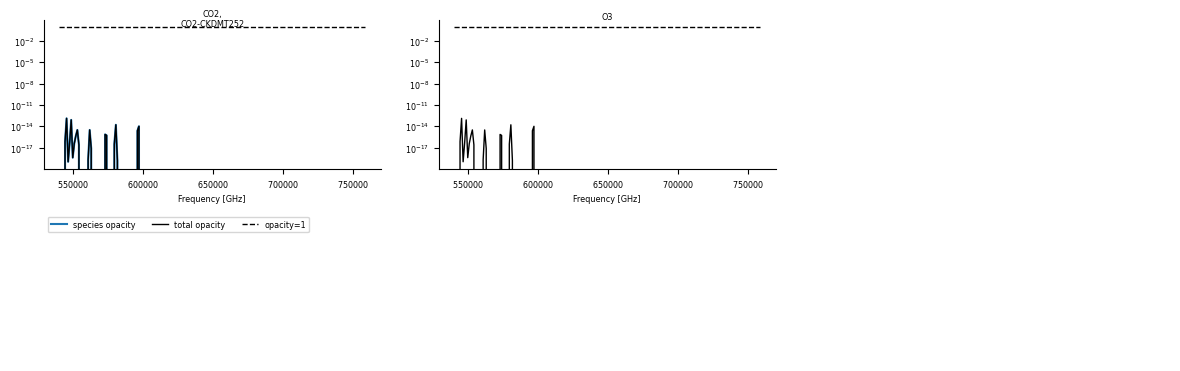

(12, 2, 200, 12)


In [58]:
# %% generate lut

# set frequency grid
min_wvn = 18000
max_wvn = 25300
n_freq_lw = 200
wvn = np.linspace(min_wvn, max_wvn, n_freq_lw)
f_grid_lw = arts.convert.kaycm2freq(wvn)


# setup ARTS
flux_simulator_LUT = fsm.FluxSimulator("TESTLUT_SW")
flux_simulator_LUT.ws.f_grid = f_grid_lw
flux_simulator_LUT.set_species(
    ["CO2,CO2-CKDMT252","O3"]
)


# Wide LUT
flux_simulator_LUT.get_lookuptableWide(recalc=False)
LUT = flux_simulator_LUT.ws.abs_lookup.value


# plot
arts_lookup.plot_arts_lookup(LUT)

plt.show()

print(LUT.xsec.shape)

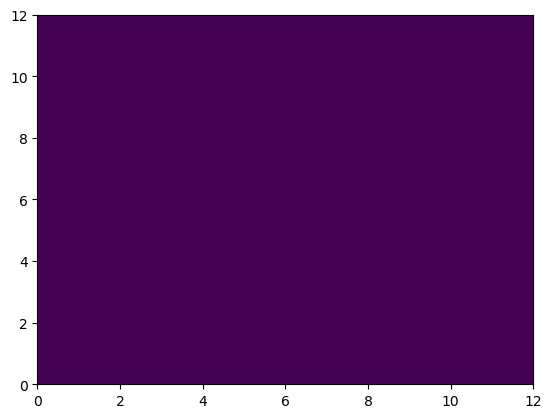

In [59]:
plt.pcolormesh(LUT.xsec[:,1,40,:])

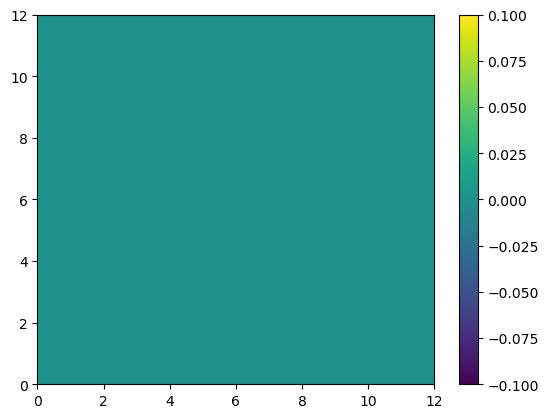

In [60]:
plt.pcolormesh(LUT.xsec[:,1,40,:])
plt.colorbar()

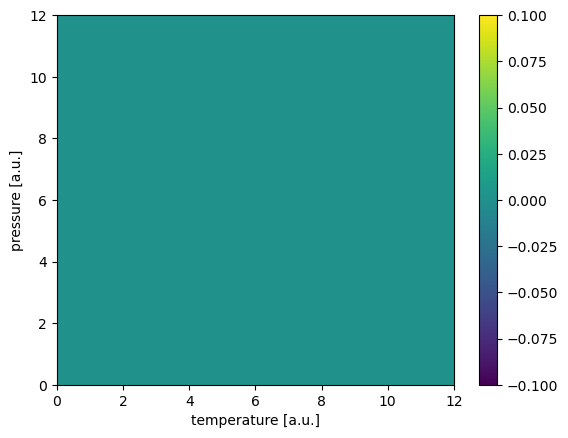

In [61]:
plt.pcolormesh(LUT.xsec[:,1,40,:])
plt.xlabel("temperature [a.u.]")
plt.ylabel("pressure [a.u.]")
plt.colorbar()

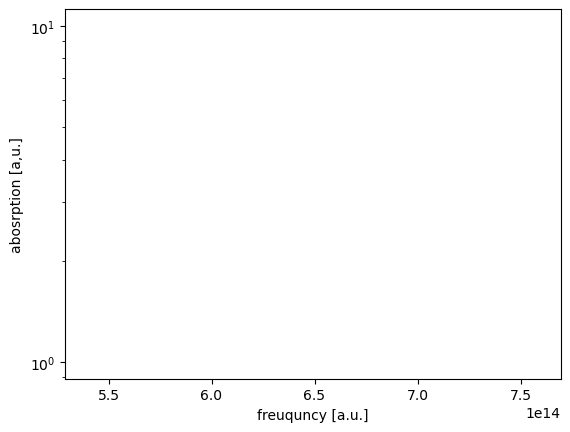

In [62]:
plt.semilogy(LUT.f_grid, LUT.xsec[8,1,:,2])
plt.xlabel("freuquncy [a.u.]")
plt.ylabel("abosrption [a,u.]")
plt.show()

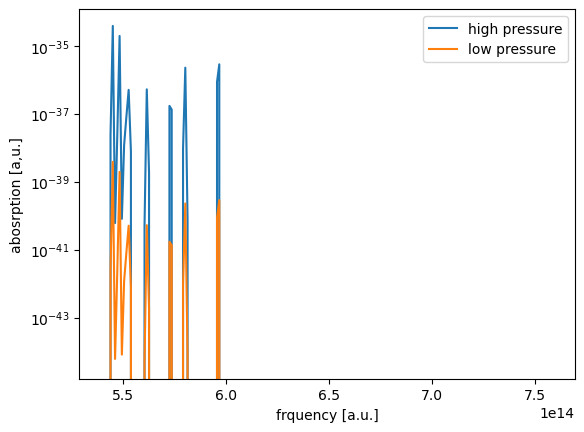

In [63]:
plt.semilogy(LUT.f_grid, LUT.xsec[8,0,:,2], label = 'high pressure')
plt.semilogy(LUT.f_grid, LUT.xsec[8,0,:,10], label = 'low pressure')
plt.xlabel("frquency [a.u.]")
plt.ylabel("abosrption [a,u.]")
plt.legend()
plt.show()

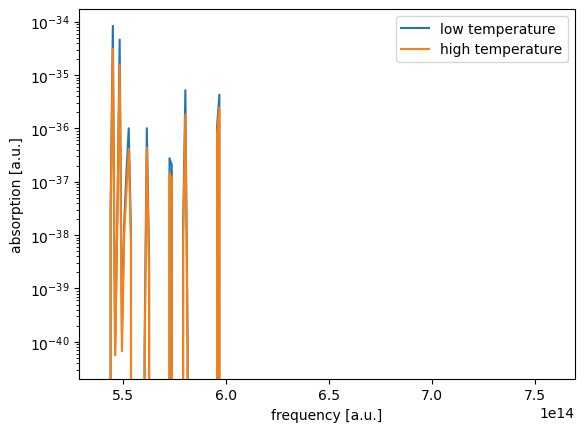

In [64]:
plt.semilogy(LUT.f_grid, LUT.xsec[2,0,:,2], label = 'low temperature')
plt.semilogy(LUT.f_grid, LUT.xsec[10,0,:,2], label = 'high temperature')
plt.xlabel("frequency [a.u.]")
plt.ylabel("absorption [a.u.]")
plt.legend()
plt.show()

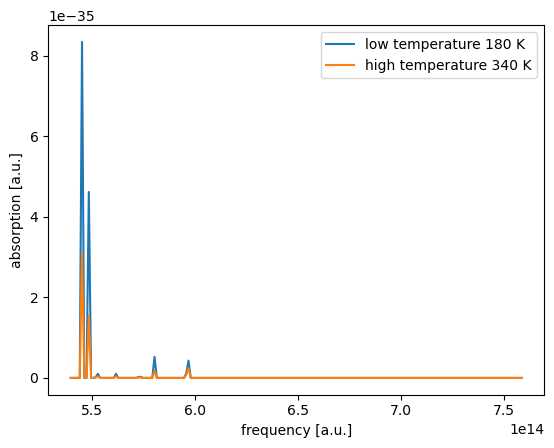

In [65]:
plt.plot(LUT.f_grid, LUT.xsec[2,0,:,2], label = 'low temperature 180 K')
plt.plot(LUT.f_grid, LUT.xsec[10,0,:,2], label = 'high temperature 340 K')
plt.xlabel("frequency [a.u.]")
plt.ylabel("absorption [a.u.]")
plt.legend()
plt.show()

In [66]:
print(LUT.xsec.shape)

(12, 2, 200, 12)


In [67]:
LUT.species


[CO2-*-*-* CO2-CKDMT252-*-*, O3-*-*-*]

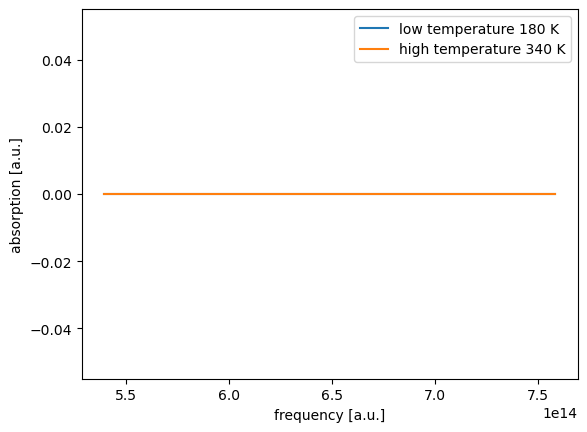

In [68]:
plt.plot(LUT.f_grid, LUT.xsec[2,1,:,2], label = 'low temperature 180 K')
plt.plot(LUT.f_grid, LUT.xsec[10,1,:,2], label = 'high temperature 340 K')
plt.xlabel("frequency [a.u.]")
plt.ylabel("absorption [a.u.]")
plt.legend()
plt.show()

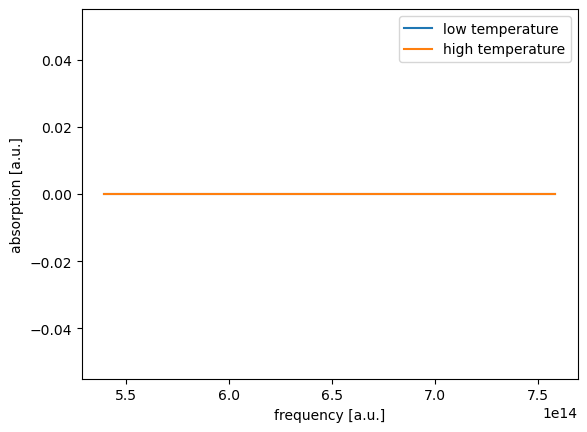

In [69]:
plt.plot(LUT.f_grid, LUT.xsec[2,1,:,2], label = 'low temperature')
plt.plot(LUT.f_grid, LUT.xsec[10,1,:,2], label = 'high temperature')
plt.xlabel("frequency [a.u.]")
plt.ylabel("absorption [a.u.]")
plt.legend()
plt.show()



In [70]:
wvn = arts.convert.freq2kaycm(LUT.f_grid)

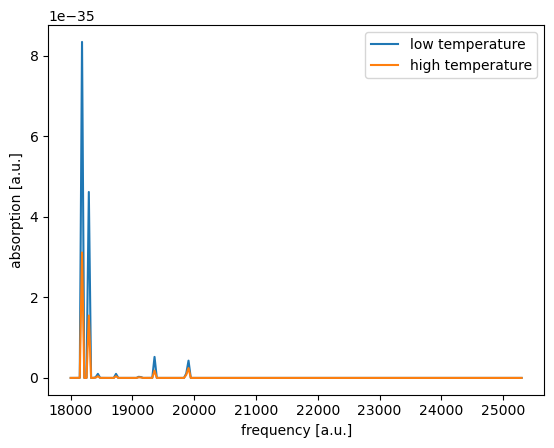

In [71]:
plt.plot(wvn, LUT.xsec[2,0,:,2], label = 'low temperature')
plt.plot(wvn, LUT.xsec[10,0,:,2], label = 'high temperature')
plt.xlabel("frequency [a.u.]")
plt.ylabel("absorption [a.u.]")
plt.legend()
plt.show()



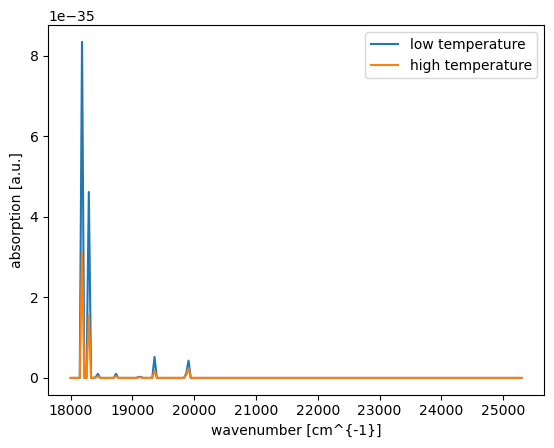

In [72]:
plt.plot(wvn, LUT.xsec[2,0,:,2], label = 'low temperature')
plt.plot(wvn, LUT.xsec[10,0,:,2], label = 'high temperature')
plt.xlabel("wavenumber [cm^{-1}]")
plt.ylabel("absorption [a.u.]")
plt.legend()
plt.show()



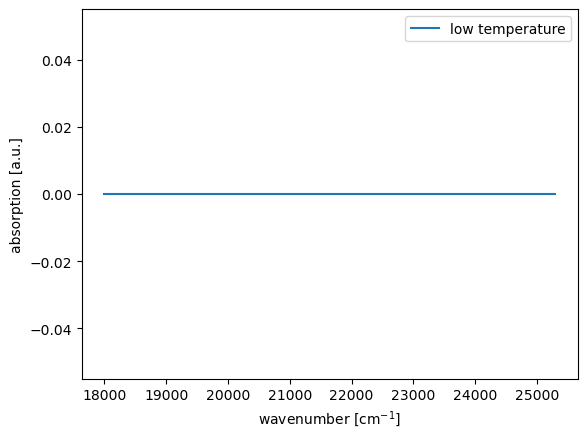

In [81]:
plt.plot(wvn, LUT.xsec[2,1,:,2], label = 'low temperature')
#plt.plot(wvn, LUT.xsec[10,1,:,2], label = 'high temperature')
plt.xlabel("wavenumber [cm$^{-1}$]")
plt.ylabel("absorption [a.u.]")
plt.legend()
plt.show()



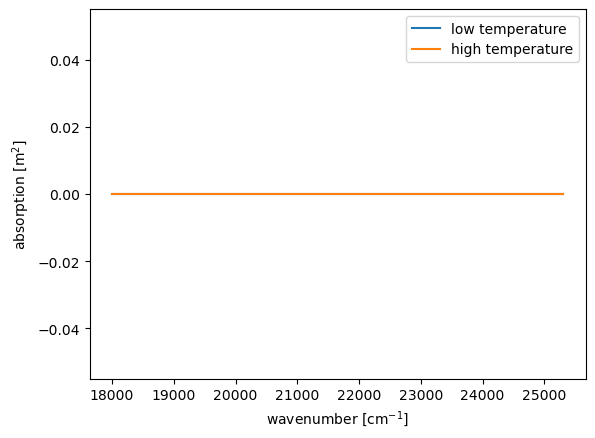

In [74]:
plt.plot(wvn, LUT.xsec[2,1,:,2], label = 'low temperature')
plt.plot(wvn, LUT.xsec[10,1,:,2], label = 'high temperature')
plt.xlabel("wavenumber [cm$^{-1}$]")
plt.ylabel("absorption [m$^{2}$]")
plt.legend()
plt.show()



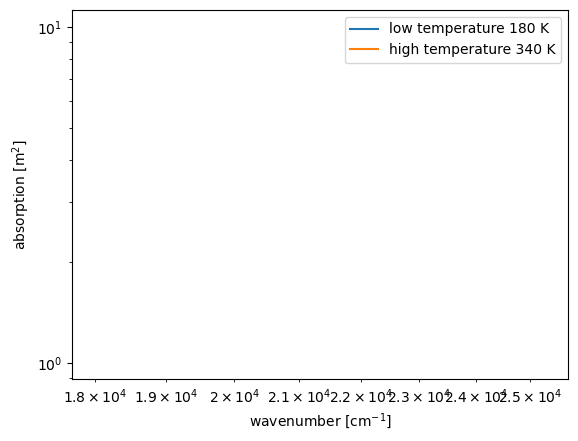

250 250 250 250 250 250 250 250 250 250 250 250

In [75]:
plt.loglog(wvn,LUT.xsec[2,1,:,2], label = 'low temperature 180 K')
plt.loglog(wvn, LUT.xsec[10,1,:,2], label = 'high temperature 340 K')
plt.xlabel("wavenumber [cm$^{-1}$]")
plt.ylabel("absorption [m$^{2}$]")
plt.legend()
plt.show()

LUT.t_pert[10]
LUT.t_ref 

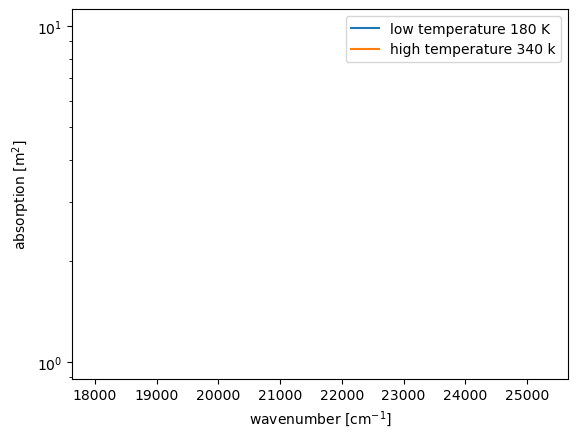

In [76]:
plt.semilogy(wvn, LUT.xsec[2,1,:,2], label = 'low temperature 180 K')
plt.semilogy(wvn, LUT.xsec[10,1,:,2], label = 'high temperature 340 k')
plt.xlabel("wavenumber [cm$^{-1}$]")
plt.ylabel("absorption [m$^{2}$]")
plt.legend()
plt.show()



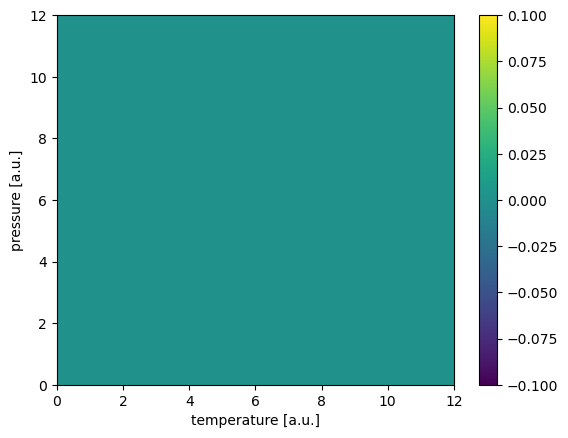

In [77]:
plt.pcolormesh(LUT.xsec[:,1,40,:])
plt.xlabel("temperature [a.u.]")
plt.ylabel("pressure [a.u.]")
plt.colorbar()


In [78]:
plt.pcolormesh(LUT.xsec[2*:,1,40,:])
plt.xlabel("temperature [a.u.]")
plt.ylabel("pressure [a.u.]")
plt.colorbar()


SyntaxError: invalid syntax (1859967067.py, line 1)

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,:,10])
plt.xlabel("temperature [a.u.]")
plt.ylabel("frequency [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[2,1,:,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("frequency [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,:,10])
plt.xlabel("frequency [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,4,:])
plt.xlabel("temperature [a.u.]")
plt.ylabel("pressure [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,0,4,:])
plt.xlabel("temperature [a.u.]")
plt.ylabel("pressure [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,0,4,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,4,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,4,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,65,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,0,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,1,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,3,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
y = LUT.p_grid
x =LUT.t_pert + LUT.t_ref
X,Y = np.meshgrid(y,x)
plt.pcolormesh(Y,X,LUT.xsec[:,1,3,:], norm = 'log')
plt.ylabel("pressure [Pa]")
plt.xlabel("temperature [K]")
plt.ylim(0,100)
plt.colorbar(label = 'absorption [m$^2$]')



: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,4,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[2,1,:,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("frequency [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[2,0,:,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("frequency [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[10,1,:,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("frequency [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,60,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,61,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,62,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,63,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,64,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,65,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,66,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[:,1,67,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("temperature [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[2,1,:,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("frequency [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[10,1,:,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("frequency [a.u.]")
plt.colorbar()

: 

In [ ]:
x = np.array(wvn)
y = np.array(LUT.p_grid)


X,Y = np.meshgrid(x,y)
plt.pcolormesh(Y,X,LUT.xsec[10,1,:,:], shading='auto', cmap ='viridis')
plt.xlabel("pressure [a.u.]")
plt.ylabel("frequency [a.u.]")
plt.colorbar()

: 

In [ ]:
plt.pcolormesh(LUT.xsec[2,0,:,:])
plt.xlabel("pressure [a.u.]")
plt.ylabel("frequency [a.u.]")
plt.colorbar()

: 

In [ ]:
x = np.log10(LUT.p_grid)
y = wvn
X,Y = np.meshgrid(x,y)
plt.pcolormesh(Y,X,LUT.xsec[2,1,:,:])
plt.ylabel("$\log_{10} (p/p_0)$")
plt.xlabel("frequency [cm$^{-1}$]")
#plt.xlim(40,80)
#plt.ylim(0,110000)
plt.yscale('linear')
plt.colorbar(label = 'absorption [m$^2$]')
plt.gca().invert_yaxis()

LUT.p_grid

: 

In [ ]:
plt.semilogy(wvn, LUT.xsec[2,0,:,2], label = 'high pressure')
plt.semilogy(wvn, LUT.xsec[2,0,:,10], label = 'low pressure')
plt.xlabel("wavenumber [cm$^{-1}$]")
plt.ylabel("absorption [m$^{2}$]")
plt.legend()
plt.show()

: 

In [ ]:
plt.semilogy(wvn, LUT.xsec[10,0,:,2], label = 'high pressure 11 000 Pa')
plt.semilogy(wvn, LUT.xsec[10,0,:,10], label = 'low pressure 1 Pa')
plt.xlabel("wavenumber [cm$^{-1}$]")
plt.ylabel("absorption [m$^{2}$]")
plt.legend()
plt.show()

: 

In [ ]:
plt.semilogy(wvn, LUT.xsec[10,1,:,2], label = 'high pressure')
plt.semilogy(wvn, LUT.xsec[10,1,:,10], label = 'low pressure')
plt.xlabel("wavenumber [cm$^{-1}$]")
plt.ylabel("absorption [m$^{2}$]")
plt.legend()
plt.show() 

: 

In [ ]:
plt.semilogy(wvn, LUT.xsec[2,1,:,2], label = 'high pressure 11000 Pa')
plt.semilogy(wvn, LUT.xsec[2,1,:,10], label = 'low pressure 1 Pa')
plt.xlabel("wavenumber [cm$^{-1}$]")
plt.ylabel("absorption [m$^{2}$]")
plt.legend()
plt.show()


LUT.p_grid[10]

: 

In [ ]:
y = LUT.p_grid
x =LUT.t_pert + LUT.t_ref
X,Y = np.meshgrid(y,x)
plt.pcolormesh(Y,X,LUT.xsec[:,1,4,:], norm = 'log')
plt.ylabel("pressure [Pa]")
plt.xlabel("temperature [K]")
plt.ylim(1000,100000)
#plt.xlim(300,340)
plt.yscale('log')
plt.colorbar(label = 'absorption [m$^2$]')



: 

In [ ]:
#now start the fit of the first plots 
#first do a one dimensional plot of the pressure dependance of the cross section at a fixed temperature 

import numpy as np
import matplotlib.pyplot as plt 
from numpy import polyfit, poly1d


#x = np.linspace(0,10,10)
x = np.log10(LUT.p_grid)
y = np.log(LUT.xsec[5,1,4,:])
#y = 5 * x**2

plt.plot(x,y)

#do a linear fitting
d = poly1d(polyfit(x,y,1))
d2 = poly1d(polyfit(x,y,2))


plt.plot(x,d(x), label = 'fit linear')
plt.plot(x,d2(x), label = 'fit quadratic')
plt.scatter(x,y, label = 'given data')
plt.xlabel("$log10(p/p_0$)")
plt.ylabel("cross section [$m^2$]")
plt.legend()
plt.show()

print(y)
print(d(6))

: 

In [ ]:
#doesn't work so far 
#now do a 1 and 2 dimensional fitting with the scipy.linalg.lstsq method

import numpy as np
from scipy.linalg import lstsq 
import matplotlib.pyplot as plt 

#define pressure grid 
#take pressure dependent cross section of ozone at 270 K 
x = np.log10(LUT.p_grid)
y = np.log(LUT.xsec[5,1,4,:])

#first do linear fit 

def lin_fit(x, y):
    #tell which fit you want to do 
    #here a linear fit at x 
    M = np.ones((len(x),2))
    M[:,1] = x
    #M[:,2] = 
    #M[:,3] = x**3

    #do the linear fit
    poly, res, s, sing = lstsq(M,y)

    print(poly)
    return poly 

# get the linear fit function 
def d(x):
    d = poly[0] +poly[1] * x
    return d 
    
"""""

#tell which fit you want to do 
#here a quadratic fit at x 
M2 = np.ones((len(x),3))
M2[:,1] = x
M2[:,2] = x**2
#M[:,3] = x**3

#do the quadratic fit
poly2, res2, s2, sing2 = lstsq(M2,y)

print(poly2)


#get the linear fit function 
def d2(x):
    d2 = poly2[0] +poly2[1] * x +poly2[2] * x**2 
    return d2 

"""""
#d = np.poly1d(poly)
#plot data and fit


poly  = lin_fit(x,y)
# get the linear fit function 
def d(x):
    d = poly[0] +poly[1] * x
    return d 
    

#plot data and fits 
plt.plot(x,d(x), label = 'linear fit')
plt.plot(x,d2(x), label = 'quadratic fit')
plt.plot(x,y,'o', label ='data')
plt.xlabel("$log10(p/p_0$)")
plt.ylabel("log10(cross section [$m^2$]/cross_section$_0$)")
plt.legend()
plt.show()

print("Residuum of linear fit is: ",res)



: 

In [ ]:
#now do a 1 dimensional fitting with the scipy.linalg.lstsq method

import numpy as np
from scipy.linalg import lstsq 
import matplotlib.pyplot as plt 

#define pressure grid 
#take pressure dependent cross section of ozone at 270 K 
x = np.log10(LUT.p_grid)
y = np.log(LUT.xsec[5,1,4,:])

#first do linear fit 

def lin_fit(x, y):
    #tell which fit you want to do 
    #here a linear fit at x 
    M = np.ones((len(x),2))
    M[:,1] = x
    #M[:,2] = 
    #M[:,3] = x**3

    #do the linear fit
    poly, res, s, sing = lstsq(M,y)

    print(poly)
    return poly 

# get the linear fit function 
def d(x):
    d = poly[0] +poly[1] * x
    return d 

poly = lin_fit(x,y)


def quad_fit(x, y):
    #tell which fit you want to do 
    #here a linear fit at x 
    M = np.ones((len(x),3))
    M[:,1] = x
    M[:,2] = x**2
    #M[:,3] = x**3

    #do the quad fit
    poly, res, s, sing = lstsq(M,y)

    print(poly)
    return poly 

# get the linear fit function 
def d(x):
    d = poly[0] +poly[1] * x
    return d 

#polyquad = quad_fit(x,y)

#get quadratic fit function 

polyquad = quad_fit(x,y)

# get the quadratic fit function 
def d2(x):
    d2 = polyquad[0] +polyquad[1] * x +polyquad[2]* x**2 
    return d2 
    

#plot data and fits 
plt.plot(x,d(x), label = 'linear fit')
plt.plot(x,d2(x), label = 'quadratic fit')
plt.plot(x,y,'o', label ='data')
plt.xlabel("$log10(p/p_0$)")
plt.ylabel("log10(cross section [$m^2$]/cross_section$_0$)")
plt.legend()
plt.show()

print("Residuum of linear fit is: ",res)
   

: 

In [ ]:
#playing a bit with arts 
# The first step is to import the pyarts package. This will make all
 # pyarts modules available to you.
import pyarts
 
 # The Workspace class is the common entry point for all pyarts simulations.
 # It is used to interface with the ARTS C++ library and to manage the
 # simulation state.
ws = pyarts.Workspace()
 
# That's it. You have created a Workspace. You can now use it to run
# simulations. For example, you can run the ARTS Hello World example:
ws.Print("Hello, World!", 0)

: 

#now do a 1 dimensional fitting with the scipy.linalg.lstsq method

import numpy as np
from scipy.linalg import lstsq 
import matplotlib.pyplot as plt 

#define pressure grid 
#take pressure dependent cross section of ozone at 270 K 
x = np.log10(LUT.p_grid)
y = LUT.t_pert + LUT.t_ref
data_z = np.log(LUT.xsec[:,1,4,:])

#first do linear fit in x and y 

def lin_fit_2d(x,y, z):
    #tell which fit you want to do 
    #here a linear fit at x 
    M = np.ones((len(x),2))
    M[:,1] = x
    M[:,2] = y
    #M[:,3] = x**3

    #do the linear fit
    poly, res, s, sing = lstsq(M,)

    print(poly)
    return poly 

poly2d = lin_fit_2d(x,y,z)




In [ ]:
#now do a 1 dimensional fitting with the scipy.linalg.lstsq method

import numpy as np
from scipy.linalg import lstsq 
import matplotlib.pyplot as plt 

#define pressure grid 
#take pressure dependent cross section of ozone at 270 K 
x = np.log10(LUT.p_grid)
y = LUT.t_pert + LUT.t_ref
data_z = np.log(LUT.xsec[:,1,4,:])

#first do linear fit in x and y 

def lin_fit_2d(x,y, z):
    #tell which fit you want to do 
    #here a linear fit at x 
    M = np.ones((len(x),3))
    M[:,1] = x
    M[:,2] = y
    #M[:,3] = x**3

    #idea from the Internet 

    degrees = [(0, 0), (1, 0), (0, 1), (2, 0), (1, 1), (0, 2)]   # degrees to use
    row = np.arange(M.shape[0])
    col = np.arange(M.shape[1])
    basis = np.array([np.outer(row**deg[0], col**deg[1]).ravel() for deg in degrees])
    coeffs = np.linalg.lstsq(basis.T, M.ravel(), rcond=None)[0]
    fit = coeffs.dot(basis).reshape(M.shape)
    #do the linear fit
    poly, res, s, sing = lstsq(M,z)

    print(poly)
    return poly 

poly2d = lin_fit_2d(x,y,data_z)

print(poly2d[0])


: 